In [4]:
import os
os.chdir('/home/jagust/dino/surf/')
from surf import *
%matplotlib inline

In [129]:
# Importing PiB Subject x Roi Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
# del pib_df.scanner
pib_df = pib_df.drop('ALL', 1)
pib_df = pib_df.drop('scanner', 1)
pib_df

,SUBID,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,Left-Hippocampus,Left-Pallidum,Left-Putamen,Left-Thalamus-Proper,Right-Amygdala,Right-Caudate,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
0,B05-201_v1,1.086826,1.30695,0.914772,1.10575,1.485336,1.520339,1.438444,1.095998,1.24386,...,1.261181,1.678135,1.815939,1.585188,1.449524,1.305483,1.19165,1.427792,0.971381,1.427594
1,B05-201_v2,1.262077,1.471517,1.007894,1.250078,1.762007,1.84082,1.644838,1.121816,1.503037,...,1.527978,1.896365,1.982312,1.949927,1.694613,1.550804,1.546884,1.80008,1.180847,1.722326
2,B05-202_v1,0.996752,1.009585,0.925908,1.059822,1.432898,1.297446,1.411028,1.100605,1.050788,...,1.032836,1.068713,1.126808,0.943386,1.051736,1.005358,0.990789,1.001359,0.866243,1.216935
3,B05-215_v1,1.127267,1.381074,0.942477,1.12963,1.582226,1.656856,1.536823,1.10263,1.360357,...,1.236287,1.516453,1.65888,1.654284,1.547849,1.320834,1.278834,1.478342,0.979637,1.422982
4,B05-215_v2,1.147965,1.253538,0.95681,1.092281,1.621212,1.61515,1.485623,1.169153,1.243665,...,1.230727,1.265551,1.608417,1.601515,1.397909,1.113494,1.333598,1.406201,1.047203,1.470536
5,B05-216_v1,1.023762,1.157034,0.94195,1.049361,1.231373,1.263895,1.337227,0.975709,0.97619,...,1.074021,1.043423,0.866399,0.91353,0.977341,1.025745,0.953268,1.010699,0.778639,0.98168
6,B05-216_v2,1.150004,1.202634,0.945866,1.13584,1.311408,1.310684,1.524631,1.009269,1.022336,...,1.036295,0.997476,1.002954,0.933247,0.936901,1.003824,0.96584,0.927819,0.932658,0.983451
7,B05-217_v1,1.028224,0.942836,0.936708,1.043872,1.284137,1.225581,1.307024,1.091938,1.009205,...,1.044124,0.999279,0.960506,0.883778,0.939117,0.955872,0.911645,0.93609,0.769666,1.090629
8,B05-217_v2,0.989056,0.947241,1.051914,1.006267,1.297097,1.218044,1.368012,1.07757,1.039125,...,1.059234,0.992348,0.996284,0.911932,0.980789,0.997719,0.911317,0.95865,0.821811,1.095473
9,B05-229_v1,0.983856,0.839358,0.882943,1.037109,1.137595,1.157793,0.999583,0.958492,0.863376,...,1.021045,1.107521,0.883888,0.968344,0.960292,1.004711,0.942215,0.917178,0.829615,1.04856


In [51]:
subs = set([])
pib_vals = np.zeros((80, ), dtype=np.float)
for val in pib_df.values:
    if float(val[2]) >= 1.08 and find_id(val[0]) not in subs:
            subs.add(val[0])
            pib_vals = np.vstack((pib_vals, np.array(val[3:])))

In [52]:
pib_vals = pib_vals[1:, :]
pib_dat = pd.DataFrame(pib_vals, dtype=float)
pib_dat.values

array([[ 1.086826,  1.30695 ,  0.914772, ...,  1.427792,  0.971381,
         1.427594],
       [ 1.262077,  1.471517,  1.007894, ...,  1.80008 ,  1.180847,
         1.722326],
       [ 1.127267,  1.381074,  0.942477, ...,  1.478342,  0.979637,
         1.422982],
       ..., 
       [ 1.081046,  1.092192,  1.001022, ...,  1.117606,  0.978803,
         1.226279],
       [ 1.159393,  1.359471,  1.005025, ...,  1.315401,  1.147568,
         1.307222],
       [ 1.275025,  1.250393,  1.001317, ...,  1.586364,  1.301374,
         1.460667]])

In [53]:
corrmat = np.array(pib_dat.corr(), dtype = float)
np.fill_diagonal(corrmat,0)
corrmat

array([[ 0.        ,  0.71897831,  0.26447565, ...,  0.61268415,
         0.50899621,  0.52131202],
       [ 0.71897831,  0.        ,  0.00746993, ...,  0.6290721 ,
         0.35152485,  0.64596713],
       [ 0.26447565,  0.00746993,  0.        , ..., -0.15697419,
         0.32897167, -0.00853759],
       ..., 
       [ 0.61268415,  0.6290721 , -0.15697419, ...,  0.        ,
         0.37332983,  0.77016151],
       [ 0.50899621,  0.35152485,  0.32897167, ...,  0.37332983,
         0.        ,  0.482572  ],
       [ 0.52131202,  0.64596713, -0.00853759, ...,  0.77016151,
         0.482572  ,  0.        ]])

In [55]:
# np.save('/home/jagust/dino/surf/mats/ignore_pib_pos/pib_pos_pib_corr_mat.npy', corrmat)

In [63]:
# Find seed
pib_g = nx.Graph(corrmat)
degs = pib_g.degree(weight='weight')
seed, curr_max = 10000, -100000
for node in degs:
    if degs[node] > curr_max:
        seed, curr_max = node, degs[node]
seed

55

In [64]:
pib_g = nx.Graph(corrmat)
add_distance_attr(pib_g)
order = [seed]
while len(order) < 80:
    rem = find_next_node(order, pib_g)
    order.append(rem)

In [69]:
mat_dir = '/home/jagust/dino/surf/mats/ignore_pib_pos/'
old_neg_mat = np.load(mat_dir + 'neg_med_mat.npy')
old_pos_mat = np.load(mat_dir + 'pos_med_mat.npy')
young_neg_mat = np.load(mat_dir + 'young_neg_med_mat.npy')
young_pos_mat = np.load(mat_dir + 'young_pos_med_mat.npy')

In [65]:
old_neg_g = nx.Graph(old_neg_mat)
add_distance_attr(old_neg_g)
old_neg_vis = [seed]
while len(old_neg_vis) < 80:
    rem = find_next_node(old_neg_vis, old_neg_g)
    old_neg_vis.append(rem)

In [66]:
old_pos_g = nx.Graph(old_pos_mat)
add_distance_attr(old_pos_g)
old_pos_vis = [seed]
while len(old_pos_vis) < 80:
    rem = find_next_node(old_pos_vis, old_pos_g)
    old_pos_vis.append(rem)

In [67]:
young_neg_g = nx.Graph(young_neg_mat)
add_distance_attr(young_neg_g)
young_neg_vis = [seed]
while len(young_neg_vis) < 80:
    rem = find_next_node(young_neg_vis, young_neg_g)
    young_neg_vis.append(rem)

In [70]:
young_pos_g = nx.Graph(young_pos_mat)
add_distance_attr(young_pos_g)
young_pos_vis = [seed]
while len(young_pos_vis) < 80:
    rem = find_next_node(young_pos_vis, young_pos_g)
    young_pos_vis.append(rem)

Old Negative
r: 0.205813408345
p: 0.0670199423596


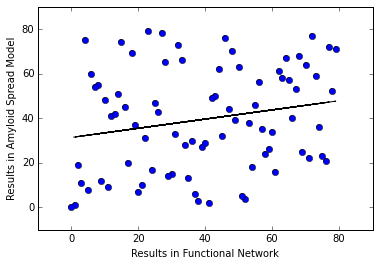

In [197]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist = [], []
visited = old_neg_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
plt.xlabel('Results in Functional Network')
plt.ylabel('Results in Amyloid Spread Model')
print 'Old Negative'
print 'r: ' + str(r)
print 'p: ' + str(p)
# ax.annotate('r: ' + str(r), xy=(79, 40))
# ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))
plt.savefig('/home/jagust/dino/surf/talk/old_neg_res.png')

Old Positive
r: -0.279207688701
p: 0.0121382373643


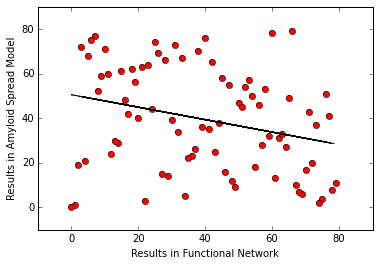

In [196]:
xlist, ylist = [], []
visited = old_pos_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'ro', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
plt.xlabel('Results in Functional Network')
plt.ylabel('Results in Amyloid Spread Model')
print 'Old Positive'
print 'r: ' + str(r)
print 'p: ' + str(p)
plt.savefig('/home/jagust/dino/surf/talk/old_pos_res.png')

In [111]:
#  Degree vs. order in func net
# Where is amyloid deposited

Young Negative
r: -0.0217533989686
p: 0.848111370518


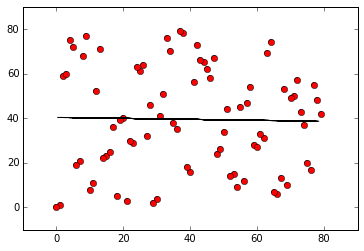

In [132]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist = [], []
visited = young_neg_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'ro', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
print 'Young Negative'
print 'r: ' + str(r)
print 'p: ' + str(p)
# ax.annotate('r: ' + str(r), xy=(79, 40))
# ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))


Young Positive
r: 0.0161040787623
p: 0.887252628204


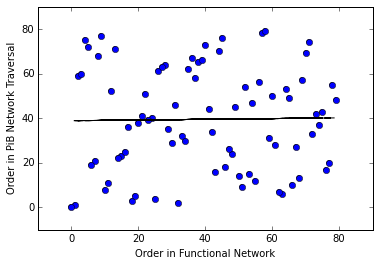

In [133]:
xlist, ylist = [], []
visited = young_pos_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')
print 'Young Positive'
print 'r: ' + str(r)
print 'p: ' + str(p)

Old
r: 0.0616736990155
p: 0.586811523169


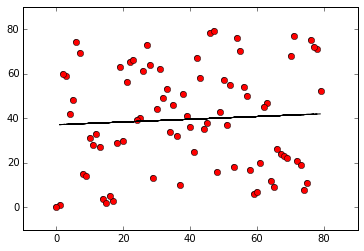

In [150]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist = [], []
visited = old_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'ro', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
print 'Old'
print 'r: ' + str(r)
print 'p: ' + str(p)
# ax.annotate('r: ' + str(r), xy=(79, 40))
# ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))

Young
r: -0.0117440225035
p: 0.917651804504


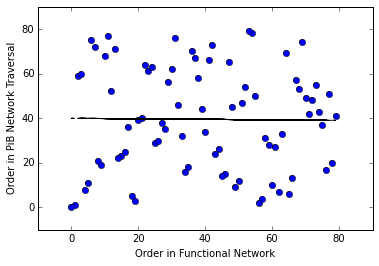

In [154]:
xlist, ylist = [], []
visited = young_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')
r, p = stats.spearmanr(xlist, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')
print 'Young'
print 'r: ' + str(r)
print 'p: ' + str(p)

In [ ]:
pib_res = range(80)
for seed in range(80):
    print seed
    pib_g = nx.Graph(corrmat)
    add_distance_attr(pib_g)
    order = [seed]
    while len(order) < 80:
        rem = find_next_node(order, pib_g)
        order.append(rem)
    pib_res[seed] = order

In [ ]:
old_neg_res = range(80)
for seed in range(80):
    print seed
    old_neg_g = nx.Graph(old_neg_mat)
    add_distance_attr(old_neg_g)
    order = [seed]
    while len(order) < 80:
        rem = find_next_node(order, old_neg_g)
        order.append(rem)
    pib_res[seed] = order

In [ ]:
pib_mst = nx.minimum_spanning_tree(nx.Graph(corrmat))

In [140]:
# Redo Young vs. Old
young_mat = np.load('/home/jagust/dino/surf/mats/ignore_pib_pos/young_med_mat.npy')
matches = np.load('/home/jagust/dino/surf/matches.npy')

In [141]:
paths = []
for match in matches:
    paths.append(str(match[0]))
    paths.append(str(match[1]))

In [143]:
def median(l):
    return np.median(np.array(l))

In [144]:
old_mat = np.zeros((80, 80))
for r in range(80):
    if r % 5 == 0:
        print r
    for c in range(80)[r:80]:
        vals = []
        for p in paths:
            mat = np.load(p)
            vals.append(mat[r][c])
        vals = sorted(vals)
        old_mat[r][c] = median(vals)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75


In [145]:
old_g = nx.Graph(old_mat)
add_distance_attr(old_g)
old_vis = [seed]
while len(old_vis) < 80:
    rem = find_next_node(old_vis, old_g)
    old_vis.append(rem)

In [153]:
young_g = nx.Graph(young_mat)
add_distance_attr(young_g)
young_vis = [seed]
while len(young_vis) < 80:
    rem = find_next_node(young_vis, young_g)
    young_vis.append(rem)

In [ ]:
for seed in range(80):
    young_pos_g = nx.Graph(young_pos_mat)
    add_distance_attr(young_pos_g)
    young_pos_vis = [seed]
    while len(young_pos_vis) < 80:
        rem = find_next_node(young_pos_vis, young_pos_g)
        young_pos_vis.append(rem)

In [147]:
# Updated Simulated Lesioning - PiB Positive For Path Attack

In [198]:
inp_fnet = old_neg_g.copy()
old_neg_degs = []
for r in order:
    old_neg_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    inp_fnet.remove_node(r)

inp_fnet = old_pos_g.copy()
old_pos_degs = []
for r in order:
    old_pos_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    inp_fnet.remove_node(r)

Simulated Lesioning - Total Weighted Degree | Node Removal 


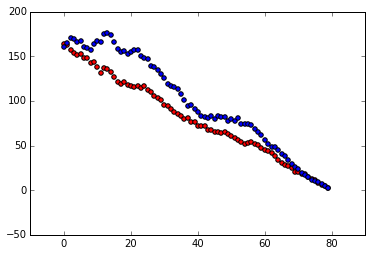

In [199]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_degs, c = 'r')
ax.scatter(range(80), old_pos_degs, c = 'b')
print "Simulated Lesioning - Total Weighted Degree | Node Removal "

In [200]:
old_neg_degs = []
old_pos_degs = []

inp_fnet = old_neg_g.copy()
rems = []
for i in range(80):
    old_neg_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    rems.append(order[i])
    dampen(inp_fnet, rems, cost = 0.5)

inp_fnet = old_pos_g.copy()
rems = []
for i in range(80):
    old_pos_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    rems.append(order[i])
    dampen(inp_fnet, rems, cost = 0.5)

Simulated Lesioning - Total Weighted Degree | Dampening - 50% 


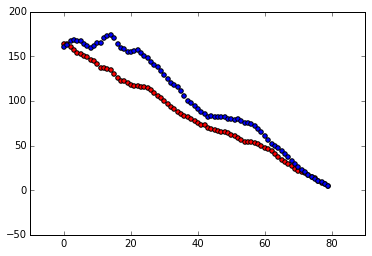

In [201]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_degs, c = 'r')
ax.scatter(range(80), old_pos_degs, c = 'b')
print "Simulated Lesioning - Total Weighted Degree | Dampening - 50% "

In [157]:
old_neg_degs = []
old_pos_degs = []

inp_fnet = old_neg_g.copy()
rems = []
for i in range(80):
    old_neg_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    rems.append(order[i])
    dampen(inp_fnet, rems, cost = 0.75)

inp_fnet = old_pos_g.copy()
rems = []
for i in range(80):
    old_pos_degs.append(np.sum(inp_fnet.degree(weight='weight').values()))
    rems.append(order[i])
    dampen(inp_fnet, rems, cost = 0.75)

Simulated Lesioning - Total Weighted Degree | Dampening - 25% 


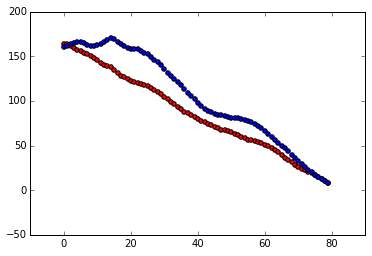

In [158]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_degs, c = 'r')
ax.scatter(range(80), old_pos_degs, c = 'b')
print "Simulated Lesioning - Total Weighted Degree | Dampening - 25% "

In [161]:
thr_old_neg_mat = util.threshold_adjacency_matrix(old_neg_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_neg_mat).copy()
old_neg_degs = []
for r in order:
    old_neg_degs.append(np.sum(inp_fnet.degree().values()))
    inp_fnet.remove_node(r)

thr_old_pos_mat = util.threshold_adjacency_matrix(old_pos_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_pos_mat).copy()
old_pos_degs = []
for r in order:
    old_pos_degs.append(np.sum(inp_fnet.degree().values()))
    inp_fnet.remove_node(r)

Simulated Lesioning - Total Degree | Node Removal 


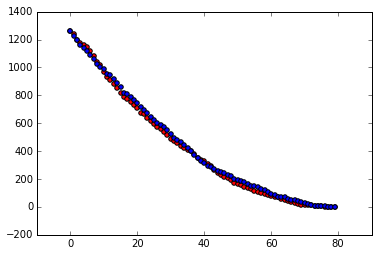

In [162]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_degs, c = 'r')
ax.scatter(range(80), old_pos_degs, c = 'b')
print "Simulated Lesioning - Total Degree | Node Removal | Binary Graph 20% Thresh "

In [165]:
thr_old_neg_mat = util.threshold_adjacency_matrix(old_neg_mat, cost = 0.25)[0]
inp_fnet = nx.Graph(thr_old_neg_mat).copy()
old_neg_degs = []
for r in order:
    old_neg_degs.append(np.sum(inp_fnet.degree().values()))
    inp_fnet.remove_node(r)

thr_old_pos_mat = util.threshold_adjacency_matrix(old_pos_mat, cost = 0.25)[0]
inp_fnet = nx.Graph(thr_old_pos_mat).copy()
old_pos_degs = []
for r in order:
    old_pos_degs.append(np.sum(inp_fnet.degree().values()))
    inp_fnet.remove_node(r)

Simulated Lesioning - Total Degree | Node Removal | Binary Graph 25% Thresh 


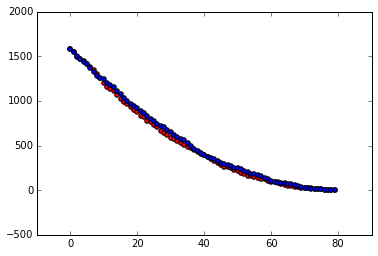

In [166]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_degs, c = 'r')
ax.scatter(range(80), old_pos_degs, c = 'b')
print "Simulated Lesioning - Total Degree | Node Removal | Binary Graph 25% Thresh "

In [179]:
thr_old_neg_mat = util.threshold_adjacency_matrix(old_neg_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_neg_mat).copy()
old_neg_discs = []
for r in order:
    old_neg_discs.append(num_disconnects(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

thr_old_pos_mat = util.threshold_adjacency_matrix(old_pos_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_pos_mat).copy()
old_pos_discs = []
for r in order:
    old_pos_discs.append(num_disconnects(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

Simulated Lesioning - Number of Disconnected Compoenents | Node Removal | Binary Graph 20% Thresh 


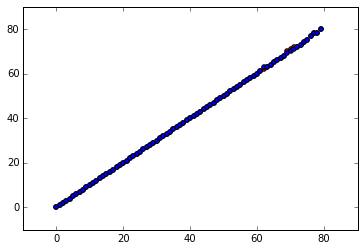

In [181]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_discs, c = 'r')
ax.scatter(range(80), old_pos_discs, c = 'b')
print "Simulated Lesioning - Number of Disconnected Compoenents | Node Removal | Binary Graph 20% Thresh "

In [182]:
thr_old_neg_mat = util.threshold_adjacency_matrix(old_neg_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_neg_mat).copy()
old_neg_clust = []
for r in order:
    old_neg_clust.append(nx.average_clustering(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

thr_old_pos_mat = util.threshold_adjacency_matrix(old_pos_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_pos_mat).copy()
old_pos_clust = []
for r in order:
    old_pos_clust.append(nx.average_clustering(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

Simulated Lesioning - Clustering | Node Removal | Binary Graph 20% Thresh 


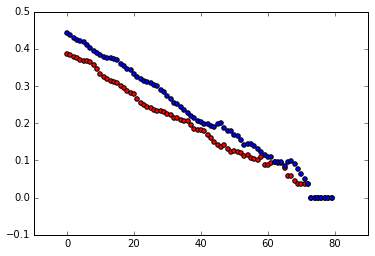

In [187]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_clust, c = 'r')
ax.scatter(range(80), old_pos_clust, c = 'b')
print "Simulated Lesioning - Clustering | Node Removal | Binary Graph 20% Thresh "

In [188]:
thr_old_neg_mat = util.threshold_adjacency_matrix(old_neg_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_neg_mat).copy()
old_neg_eff = []
for r in order:
    old_neg_eff.append(find_eff(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

thr_old_pos_mat = util.threshold_adjacency_matrix(old_pos_mat, cost = 0.20)[0]
inp_fnet = nx.Graph(thr_old_pos_mat).copy()
old_pos_eff = []
for r in order:
    old_pos_eff.append(find_eff(inp_fnet))
    inp_fnet.remove_edges_from(inp_fnet.edges(r))

Simulated Lesioning - Efficiency | Node Removal | Binary Graph 20% Thresh 


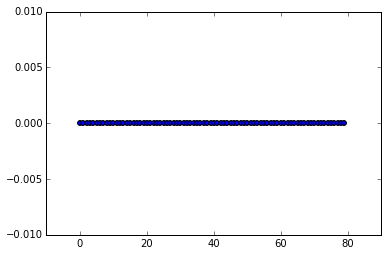

In [190]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), old_neg_eff, c = 'r')
ax.scatter(range(80), old_pos_eff, c = 'b')
print "Simulated Lesioning - Efficiency | Node Removal | Binary Graph 20% Thresh "

E4 Negative
-0.0658645034909 0.561598269774
E4 Positive
0.149828305184 0.184669019653


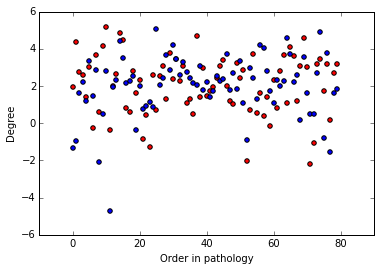

In [120]:
# Degree vs. Order
old_neg_degs = old_neg_g.degree(weight='weight').values()
old_pos_degs = old_pos_g.degree(weight='weight').values()
neg_pts, pos_pts = [], []
for ind in range(len(order)):
    node = order[ind]
    neg_pts.append(old_neg_degs[node])
    pos_pts.append(old_pos_degs[node])

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), neg_pts, c='r')
r, p = stats.pearsonr(range(80), neg_pts)
print "E4 Negative"
print r, p
ax.scatter(range(80), pos_pts, c='b')
r, p = stats.pearsonr(range(80), pos_pts)
print "E4 Positive"
print r, p
plt.xlabel("Order in pathology")
plt.ylabel("Degree")

E4 Young Negative
-0.120762911918 0.285950366669
E4 Young Positive
-0.102212165796 0.366955448815


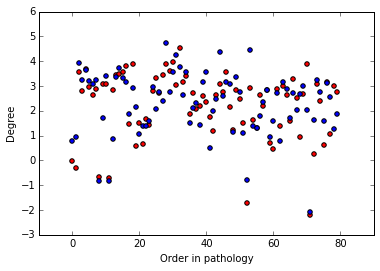

In [167]:
# Degree vs. Order
young_neg_degs = young_neg_g.degree(weight='weight').values()
young_pos_degs = young_pos_g.degree(weight='weight').values()
neg_pts, pos_pts = [], []
for ind in range(len(order)):
    node = order[ind]
    neg_pts.append(young_neg_degs[node])
    pos_pts.append(young_pos_degs[node])

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(80), neg_pts, c='r')
r, p = stats.pearsonr(range(80), neg_pts)
print "E4 Young Negative"
print r, p
ax.scatter(range(80), pos_pts, c='b')
r, p = stats.pearsonr(range(80), pos_pts)
print "E4 Young Positive"
print r, p
plt.xlabel("Order in pathology")
plt.ylabel("Degree")

In [186]:
def find_eff(g, bin = True):
    ''' Finds the efficiency of a network
    Parameters
    ----------
    g : A binary unweighted graph
    
    Returns
    -------
    eff : Efficiency
    
    Notes:
    
    '''
    effs = []
    for node in g.nodes():
        nodal_effs = []
        for target in g.nodes():
            if node == target:
                continue
            else:
                try:
                    if bin:
                        sp = nx.shortest_path(g, node, target)
                    else:
                        sp = nx.shortest_path(g, node, target, weighted='distance')
                    nodal_effs.append(1.0 / sp)
                except:
                    nodal_effs.append(0.0)
        effs.append(np.mean(nodal_effs))
    return np.mean(effs) / 2.0

In [104]:
def dampen(g, nodes, cost = 0.5):
    for node in nodes:
        for edge in g.edges(node, data=True):
            edge[2]['weight'] *= cost
    add_distance_attr(g)
def remove_neg_weights(g):
    for e in g.edges(data=True):
        if g.edge[e[0]][e[1]]['weight'] < 0:
            g.remove_edge(e[0], e[1])

In [58]:
def find_next_node(r, g):
    """ Slight variation of Prim's Algorithm; instead of minimizing the total 
    """
    nodes = g.nodes()
    distance = {}
    for node in nodes:
        if node in r:
            continue
        distance[node] = 0.0
        for removed in r:
            distance[node] += nx.shortest_path_length(g, node, removed, weight='distance')
        sorted_distances = sort_by_val(distance)
    return sorted_distances[0][0]

In [169]:
def num_disconnects(g):
    ''' Finds number of disconnected nodes '''
    count = 0
    for subg in nx.connected_component_subgraphs(g):
        if len(subg.nodes()) == 1:
            count += 1
    return count